In [1]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def divFreeKern(x, y):
    '''
    input: 
        - x and y two row vectors in R^n.
    output: 
        - k(x, y) divergence-free kernel R^nxn matrix.
    '''
    
    n = len(x)
    d = x - y
    normd = -0.5 * np.sum(d**2)
    T1 = np.exp(normd)
    
    In = np.eye(n, n)
    v = np.reshape(d, (n, 1))
    vt = np.transpose(v)
    
    T2 = v.dot(vt)+((n-1)-np.sum(d**2))*(In)
    
    return(T1*T2)

In [3]:
def covarianceMats(X, Kern):
    '''
    inputs:
        - X: [x_1, x_2, ... , x_n] numpy array with points x_1 \in R^d as row vectors. 
        - Kern: covaraince function. 
    output: 
        - Mats: list of covariance matrices sKern(x_i, x_j)
    '''
    k = 0
    Mats = {}

    for i, x in enumerate(X):
        for j, y in enumerate(X):
            Mats[k] = Kern(x, y)
            k = k + 1
    
    return(Mats)

In [19]:
def kMat(Mats, X):
    '''
        inputs: 
            - Mats :  list of covariance matrices Kern(x_i, x_j)
            - X: [x_1, x_2, ... , x_n] numpy array with points x_1 \in R^d as row vectors.
        output: 
            - K: Vector valued covariance matrix with jth row [Kern(x_j, x_0), ... , K(x_j, x_n)]
    '''
    npts = len(X)
    nd = len(Mats[0])

    K  = np.identity(npts * nd)
    
    nMat = 0
    for r in range(0, npts*nd , nd):
        for c in range(0, npts*nd, nd):
            K[r:(r+2), c:(c+2)] = Mats[nMat]
            nMat = nMat + 1
            
            
    return(K)

In [30]:
X = np.array([[1., 2.], [0., 2.], [1., 0.]])
X

array([[1., 2.],
       [0., 2.],
       [1., 0.]])

In [31]:
Mats = covarianceMats(X, divFreeKern)

In [32]:
IK = kMat(Mats, X)

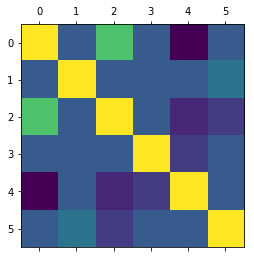

In [33]:
plt.matshow(IK)
plt.show()

In [24]:
np.random.seed(0)
npts = len(X)

mu = np.zeros(2*npts)
Z = np.random.multivariate_normal(mu, IK, 1)

In [25]:
Z

array([[-1.66971669, -0.60476295, -0.99798151, -0.1047281 , -0.63440065,
         2.46072433, -2.11010126, -1.28572122]])